# Predicting Heart-disease using machine learning

This  notebook looks into using various Python-based machine learning and data science libraries in attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes. 

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem definition

In a statement,
> Given clinical  parameters about a patient can we predict whether or not they have heart disease

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease
There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation
> If we can reach 95%  accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

## 4. Features
This is where to get different information about each of the features in the data

 ***create a data dictionary***
- **age**: age in years
- **sex**: (1 = male; 0 = female)
- **cp**: chest pain type
    - 0: Typical angina — chest pain related to decreased blood supply to the heart
    - 1: Atypical angina — chest pain not related to the heart
    - 2: Non-anginal pain — typically esophageal spasms (non-heart related)
    - 3: Asymptomatic — chest pain not showing signs of disease
- **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
    - Anything above 130-140 is typically a cause for concern
- **chol**: serum cholesterol in mg/dL
    - serum = LDL + HDL + 0.2 * triglycerides
    - Above 200 is cause for concern
- **fbs**: (fasting blood sugar > 120 mg/dL) (1 = true; 0 = false)
    - '>126 mg/dL' signals diabetes
- **restecg**: resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality — can range from mild symptoms to severe problems; signals non-normal heartbeat
    - 2: Possible or definite left ventricular hypertrophy — enlarged heart's main pumping chamber
- **thalach**: maximum heart rate achieved
- **exang**: exercise-induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest (looks at stress of the heart during exercise; an unhealthy heart will stress more)
- **slope**: the slope of the peak exercise ST segment
    - 0: Upsloping — better heart rate with exercise (uncommon)
    - 1: Flatsloping — minimal change (typical healthy heart)
    - 2: Downsloping — signs of unhealthy heart
- **ca**: number of major vessels (0-3) colored by fluoroscopy
    - Colored vessel means the doctor can see blood passing through; the more blood movement, the better (no clots)
- **thal**: thallium stress result
    - 1, 3: Normal
    - 6: Fixed defect — used to be a defect but is okay now
    - 7: Reversible defect — no proper blood movement when exercising
- **target**: have disease or not (1 = yes; 0 = no) (the predicted attribute)


## Preparing the tools


In [136]:
# Import all the tools we need

# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')
import seaborn as sns

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, RocCurveDisplay

# Load data

In [137]:
df = pd.read_csv('./assets/heart-disease.csv')
df.shape

(303, 14)

## Exploratory Data analysis or EDA
The goal here is to find out more about the data and become a subject matter expert on the data you are working with.

1. What question(s) are my trying to solve?
2. what kind of data do I have and how do I treat different types?
3. What is missing from the data and how do I deal with it?
4. Where are the outliers and why should I care about them?
5. How can I add, change, or remove features to get more out of my data?

In [138]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [139]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

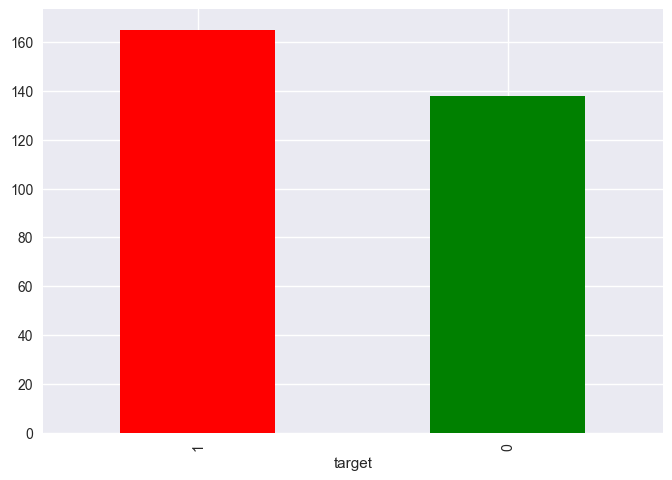

In [140]:
df['target'].value_counts().plot(kind='bar', color=['red', 'green']);

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [142]:
# what is missing from the data and how do we address it
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**No missing value in our data**

In [143]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [144]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [145]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


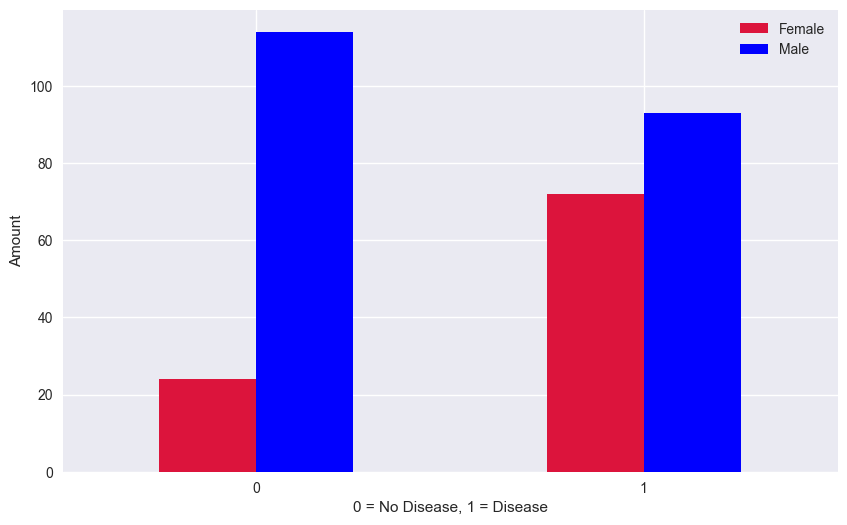

In [146]:
# create a plot crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,6), color=['crimson', 'blue'])
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0);

## Age vs Max Heart Rate for Heart disease

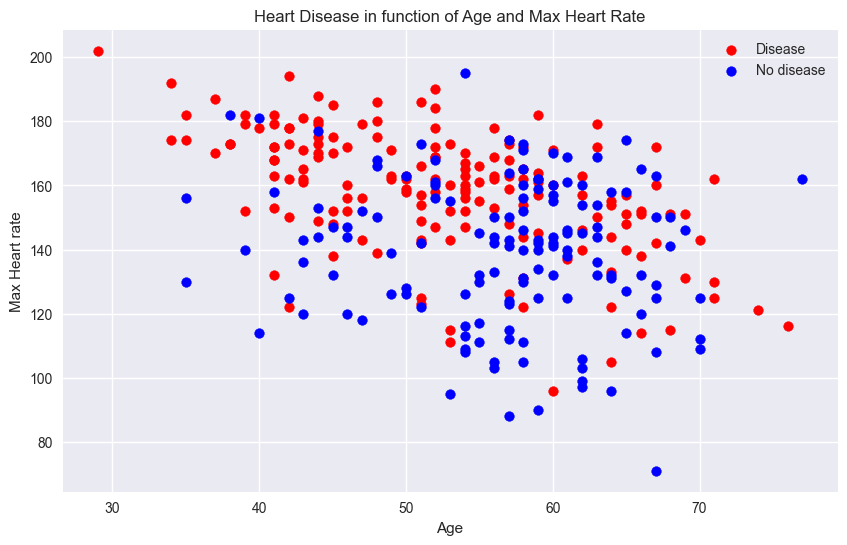

In [147]:
# create anopther figure
plt.figure(figsize=(10,6))

# sctter with positive samples
plt.scatter(df.age[df['target']==1],
            df.thalach[df['target']==1],
            c='red');

# scatter with negative  sample
plt.scatter(df.age[df['target']==0],
            df.thalach[df['target']==0],
            c='blue');

# Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate');
plt.xlabel('Age')
plt.ylabel('Max Heart rate')
plt.legend(['Disease', 'No disease'])


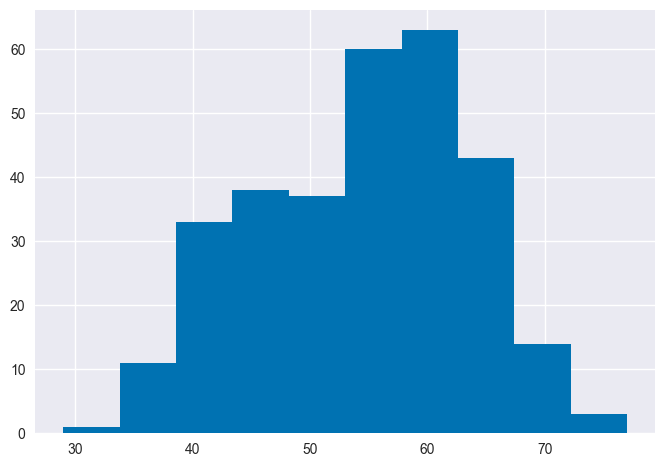

In [148]:
# Check the distribution of the Age column with a histogram
plt.hist(df['age']);

## Heart disease frequency per chest pain type
- **cp**: chest pain type
    - 0: Typical angina — chest pain related to decreased blood supply to the heart
    - 1: Atypical angina — chest pain not related to the heart
    - 2: Non-anginal pain — typically esophageal spasms (non-heart related)
    - 3: Asymptomatic — chest pain not showing signs of disease

In [149]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


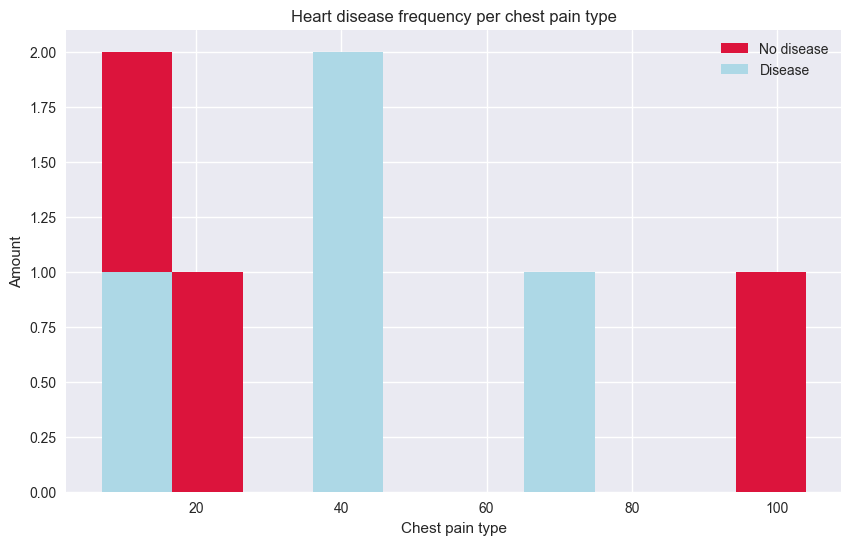

In [150]:
# make cro9sstab more visual
pd.crosstab(df.cp, df.target).plot(kind='hist',
                                   figsize=(10,6), 
                                   color=['crimson', 'lightblue'])

# Add more info
plt.title('Heart disease frequency per chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['No disease', 'Disease'])
plt.xticks(rotation =0);


In [151]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [152]:
# Understanding the correlation between the independent variables using the correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


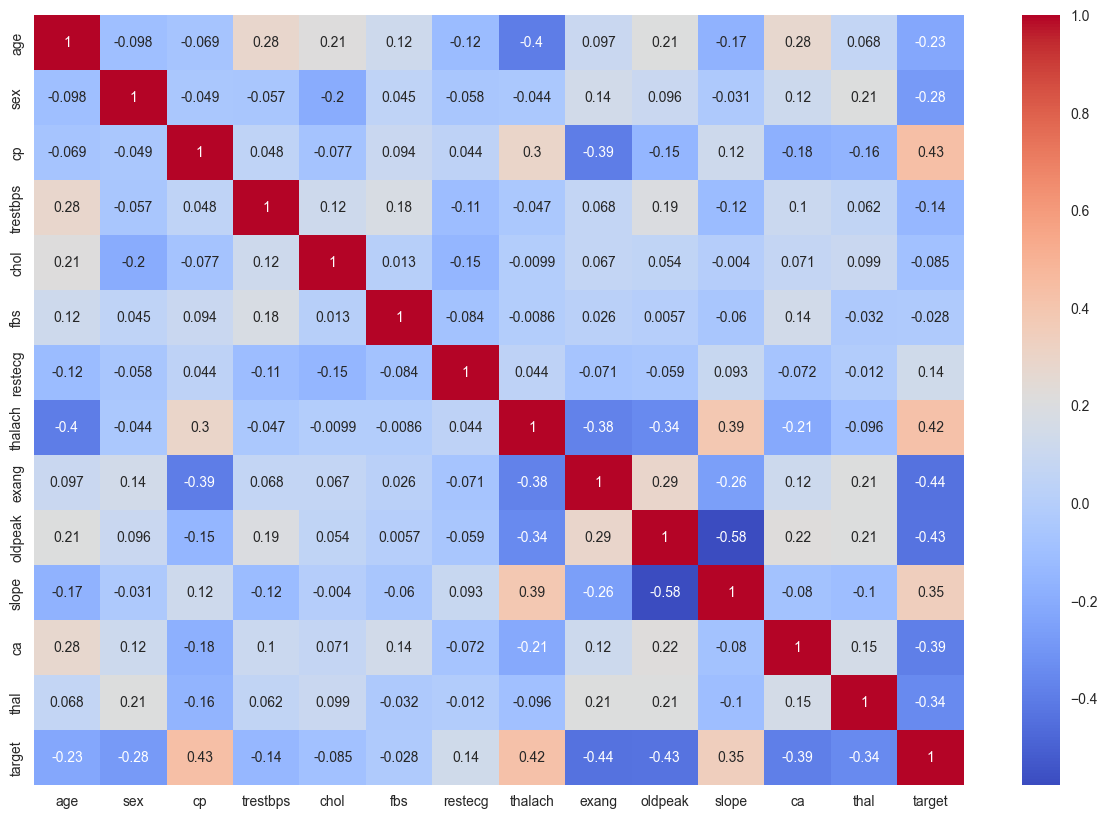

In [153]:
# plot the correction matrix witb seaborn
corr_mat = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm');

## 5. Modelling

In [154]:
# split the data
X = df.drop('target',axis=1)
y = df['target']

# split the data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [155]:
X_train.shape, y_train.shape

((242, 13), (242,))

After splitting we need to build a machine learning model.

We'll train the model to find patterns on the training set and then we evaluate/test the model on the test set.

We are going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [156]:
# Put and instantiate models in a dictionary
models = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    """
    Fits and evaluates given machine learning models.
    models: a dictionary of different scikit-Learn machine learning models
    X_train: training data
    X_test: testing data
    y_train: training labels
    y_test: test labels
    
    """
    # set a random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores={}
    
    # Loop through the models
    for model_name, model in models.items():
        #fit the model
        model.fit(X_train, y_train)
        
        # Evaluate the model and append it's score to the model_scores
        scores = model.score(X_test, y_test)
        model_scores[model_name] = scores
    return model_scores

In [157]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             y_train=y_train,
                             X_test=X_test,
                             y_test=y_test)

model_scores

/Users/Gift/.pyenv/versions/3.12.4/envs/project_heart-disease_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

### Model comparison



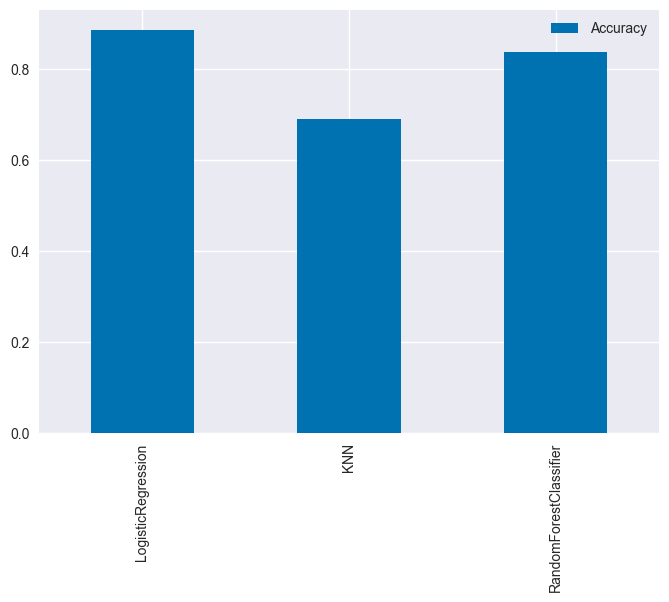

In [158]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar();

*It seems to show that our Logistic Regression model yeilded better accuracy compared to the rest of the models*

Now we've got a baseline model... and i know a model's forst predictions aren't always what we should base our next steps off. What weill be done:

Let's look at the following
- Hyperparameter tuning
- Feature importance
- Confusion matrix
- Cross-validation
- Preecision
- Recall
- F1 score
- ROC curve
- Area under the curve (AUC)

### Hyperparameter Tunning (By hand)

In [159]:
# Let's tune KNN

train_score =[]
test_scores = []

# create a list of diffferent values for n-neighors
neighbors = range(1, 21)

# Instantiate KNN 
knn = KNeighborsClassifier()

# Loop through different n-neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the model
    knn.fit(X_train,y_train)
    
    #Update the training score
    train_score.append(knn.score(X_train, y_train))
    
    # Update the test score
    test_scores.append(knn.score(X_test, y_test))
    
    
    

In [160]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [161]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


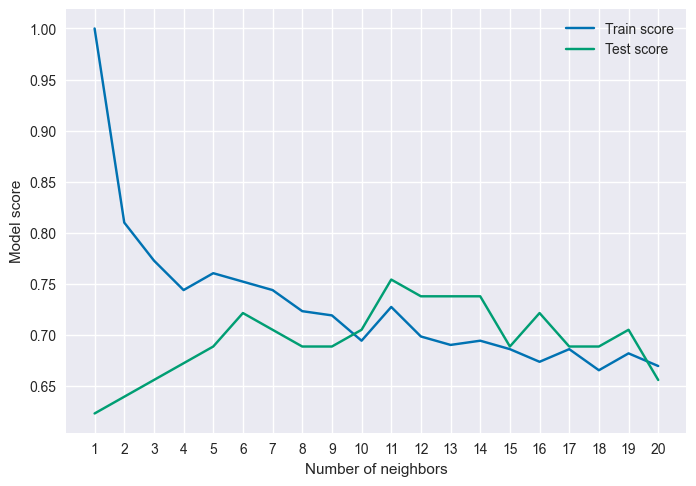

In [162]:
plt.plot(neighbors, train_score, label = 'Train score')
plt.plot(neighbors, test_scores, label = 'Test score')
plt.xticks(range(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

## Hyperparameter tuning with RandomisedSearchCV

we're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomisedSearchCV


In [163]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver':['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10,1000,50),
    'max_depth': [None, 3,5,10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf': np.arange(1,20,2)
    }

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomisedSearchCV


In [164]:
# Tuning LogisticRgression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [165]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [166]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

After tunning LogisticRegression model, let's tune the RandomForestClassifier

In [167]:
# Setup random seed

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           verbose=True,
                           n_iter=20)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [168]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [169]:
# Evaluate the randomised search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.8688524590163934

In [170]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

## Hyperparameter tuning with GridSearchCV
Since our LogisticRegression model provides  the best scores so far, we'll try and improve them using GridSearchCV

In [171]:
# Different hyperparameter for our logisticRegression model
log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver':['liblinear']}

# Setup grid haperparameter search for LogisticRegression
gs_log_Reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#fit the grid parameter search model
gs_log_Reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [172]:
# Check the best hyperparameters
gs_log_Reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [173]:
# Evaluate the grid search LogisticRegression model with test set
gs_log_Reg.score(X_test, y_test)

0.8852459016393442

# Evaluating the tuned machine learning classifier beyond accuracy

* ROC curve and AUC roc_curve
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-score

... and it would be great if cross validation was used where possible

In [174]:
#Make prediction with tuned model
y_preds = gs_log_Reg.predict(X_test)

In [175]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [176]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [177]:
roc_curve(y_test,y_preds)

(array([0.        , 0.13793103, 1.        ]),
 array([0.     , 0.90625, 1.     ]),
 array([inf,  1.,  0.]))

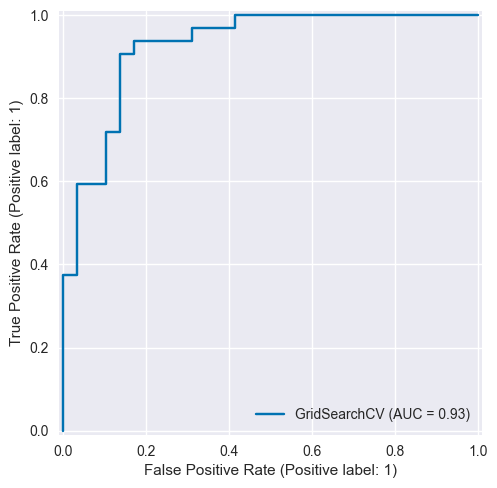

In [178]:
# plot ROC Curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_Reg, X_test, y_test);


In [179]:
#Confusion metrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


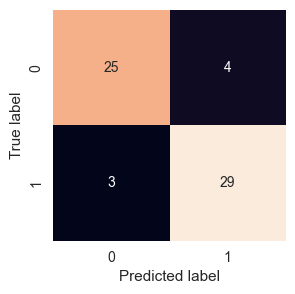

In [180]:
def plot_conf_mat(y_test, y_preds):
    '''
    Plot a confusion matrix using seaborn's heatmap
    '''
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
plot_conf_mat(y_test, y_preds)

Now, we've got an ROC_curve, AUC_curve, and a confusion matrix. Let's get a classification_report as well cross_validated precision, recall and f1_score

In [181]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculating evaluation metrics using cross-validation


We're going to be calculating accuracy, precision, recall,  and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [182]:
# we will be using the best parameters of the LogisticRegression model since it outperformed the other models
gs_log_Reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [183]:
# creasting a new classifier with best parameter
clf = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')

In [184]:
# cross-validated accuracy
cv_acc =cross_val_score(clf,
                        X,
                        y,
                        scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [185]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

In [186]:
# cross-validated precision
cv_precision =cross_val_score(clf,
                        X,
                        y,
                        scoring='precision')
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [187]:
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8215873015873015)

In [188]:
# cross-validated recall
cv_recall =cross_val_score(clf,
                        X,
                        y,
                        scoring='recall')
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [189]:
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9272727272727274)

In [190]:
# cross-validated f1-score
cv_f1_score =cross_val_score(clf,
                        X,
                        y,
                        scoring='f1')

cv_f1_score

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [191]:
cv_f1_score = np.mean(cv_f1_score)
cv_f1_score

np.float64(0.8705403543192143)

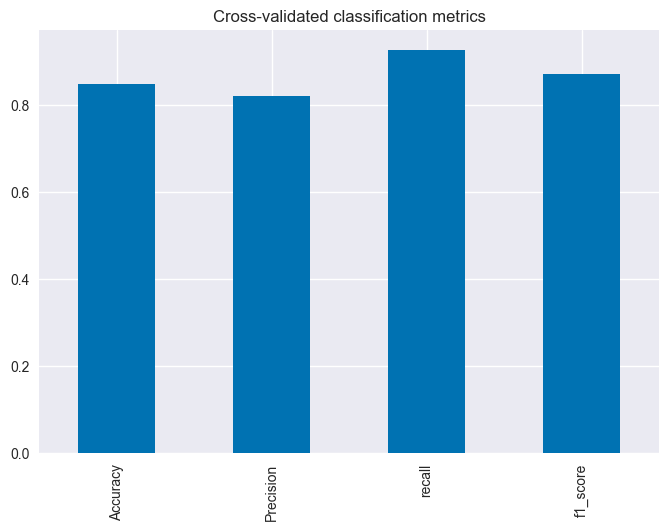

In [192]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
              'Precision': cv_precision,
              'recall': cv_recall,
              'f1_score': cv_f1_score},
                          index=[0])
cv_metrics.T.plot(kind='bar', title='Cross-validated classification metrics',
                  legend=False);

### Feature Importance
Feature importance in another way is asking " which feature contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model

In [193]:
# Fit an instance of LogisticRegression
clf =  LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [194]:
#check coef_
clf.coef_

array([[ 0.00316728, -0.86044654,  0.66067039, -0.01156993, -0.00166374,
         0.04386106,  0.3127585 ,  0.02459361, -0.60413082, -0.56862801,
         0.45051629, -0.63609898, -0.67663371]])

In [195]:
# Let's match coef's of feature to the columns of the data
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672803473471746),
 'sex': np.float64(-0.8604465397334717),
 'cp': np.float64(0.6606703933230701),
 'trestbps': np.float64(-0.011569932224142465),
 'chol': np.float64(-0.0016637439444753457),
 'fbs': np.float64(0.043861055458486765),
 'restecg': np.float64(0.31275849953638685),
 'thalach': np.float64(0.0245936131980898),
 'exang': np.float64(-0.604130820900716),
 'oldpeak': np.float64(-0.5686280121446481),
 'slope': np.float64(0.45051628712277775),
 'ca': np.float64(-0.6360989818014864),
 'thal': np.float64(-0.6766337106855729)}

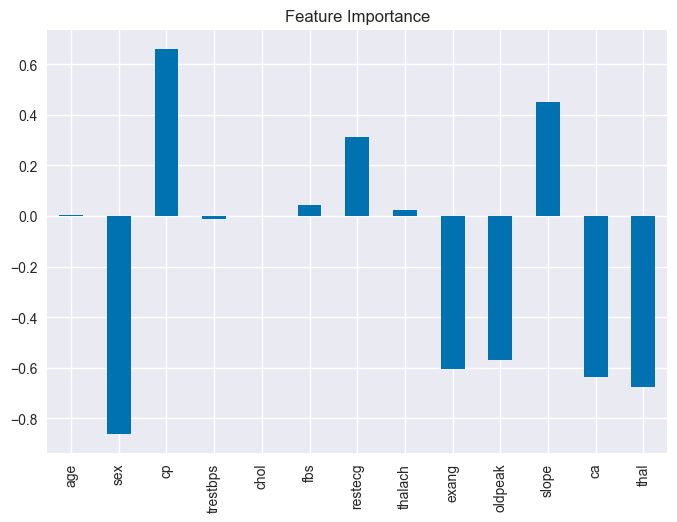

In [197]:
# Now let's visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(kind='bar', title='Feature Importance', legend=False);

In [199]:
# Save the model
import pickle
with open('./model/Logistic_Regression_model_with_GridSearchCV.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [200]:
# Load the saved model from the file
with open('./model/Logistic_Regression_model_with_GridSearchCV.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)
print("Predictions: ", y_pred)


Predictions:  [0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
